In [12]:
import sys
sys.path.append('../')

import importlib
importlib.reload(pcd)


NameError: name 'magpie' is not defined

In [1]:
import numpy as np
import copy
from PIL import Image
import open3d as o3d
import matplotlib.pyplot as plt
from magpie.perception import pcd
# from open3d.web_visualizer import draw

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 2.0.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/wxie/.local/lib/python3.10/site-packages/ipykernel_launcher.py", l

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [2]:
from magpie import realsense_wrapper as real
rsc = real.RealSense()
rsc.initConnection()

In [8]:
rsc.disconnect()

In [3]:
# from magpie.perception.label_owlvit import LabelOWLViT
from magpie.perception.label_owlv2 import LabelOWLv2
# path = "google/owlvit-base-patch32"
# label_vit = LabelOWLViT(pth=path, topk=3)
# label_vit = LabelOWLViT(pth=path, topk=3, v2=True)
label_vit = LabelOWLv2(topk=3)

2024-08-20 12:46:52.808390: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 12:46:52.808448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 12:46:52.912471: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-20 12:46:53.117632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-20 12:46:54.571357: W tensorflow/compiler/tf2

In [4]:
# from magpie.perception.mask_sam import MaskSAM
# ckpt = "/home/will/workspace/owlvit_segment_anything/sam_vit_h_4b8939.pth"
# mask_sam = MaskSAM(ckpt)

In [4]:
p, rgbd_image = rsc.getPCD()
# p, rgbd_image = rsc.getPCD(adjust_extrinsics=True)
image = np.array(rgbd_image.color)
queries = ["a photo of an apple", "a photo of a lemon", "a photo of a lime", "a photo of a pear", "a photo of a onion"]
queries = ["a photo of an blue cylindrical container", "a photo of a small red cubic block", "a photo of a screwdriver handle" ]
queries = ["a photo of a black student ID card", "a photo of a small orange fruit", "a photo of a small plastic bag"]
queries = ["a photo of an avocado", "a photo of a small orange fruit", "a photo of a small plastic bag", "a photo of a paper airplane"]
queries = ["a photo of a water bottle with a red top"]
queries = ["a photo of a blue block"]
# queries = ["a photo of a tail"]
# queries = ["a photo of a black handle of a pair of scissors"]
abbrevq = ["apple", "lemon", "lime", "pear", "onion"]
abbrevq = ["blue", "block", "handle"]
abbrevq = ["card", "orange", "bag"]
abbrevq = ["avocado", "orange", "bag", "paper airplane"]
abbrevq = ["block"]
label_vit.set_threshold(0.001)
bboxes, uboxes = label_vit.label(image, queries, abbrevq, plot=True, topk=True)


IndexError: index 1110 is out of bounds for dimension 0 with size 378

In [7]:
len(label_vit.results[0]['boxes'])

407

In [13]:
image.shape

(720, 1280, 3)

In [27]:
label_vit.TOP_K = 10
image = np.array(rgbd_image.color)
queries = ["blue"]
scores, boxes, labels = label_vit.sorted_scores, label_vit.sorted_boxes_coords, label_vit.sorted_labels

label_vit.plot_predictions(image, queries, scores, boxes, labels, topk=False)

ValueError: Image size of 792255x398669 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x800 with 1 Axes>

[1144.114501953125, 98.02268981933594, 1274.168701171875, 444.7958679199219, 0.14806154370307922]
[626.105712890625, 368.69927978515625, 681.1859741210938, 412.7840576171875, 0.5293076038360596]
[1170.53662109375, 362.4563293457031, 1278.025146484375, 444.95318603515625, 0.11251670122146606]


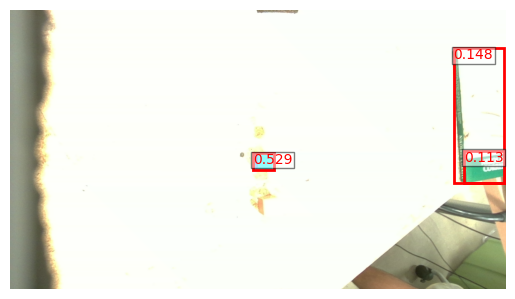

In [20]:
import matplotlib.patches as patches

img = image
# swap height and width of img
# img = np.transpose(img, (1, 0, 2))
results = label_vit.results
i = 0
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]
boxes = [b.tolist() + [s] for b, s in zip(boxes, scores.tolist())]
# boxes = label_vit.sorted_boxes_coords
# boxes = [b.tolist() + [s] for b, s in zip(boxes, scores.tolist())]
fig, ax = plt.subplots(1)
ax.imshow(img)
# filter out boxes where confidence is less than 0.1
boxes = [box for box in boxes if box[-1] > 0.1]
# Add bounding boxes
for box in boxes:
    print(box)
    # multiply elementsof box by 2
    x1, y1, x2, y2, confidence = box
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{confidence:.3f}', color='red', verticalalignment='top', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 1})

plt.axis('off')
plt.show()

[588.321383   193.25037405 644.35722113 221.7319496 ]
[611.21247053 129.11778018 667.85224199 161.01039603]
[569.28702116 250.97068995 622.957623   280.48589498]
[ 5.04505539e+01 -4.05764580e-02  1.29016941e+03  4.06715906e+02]


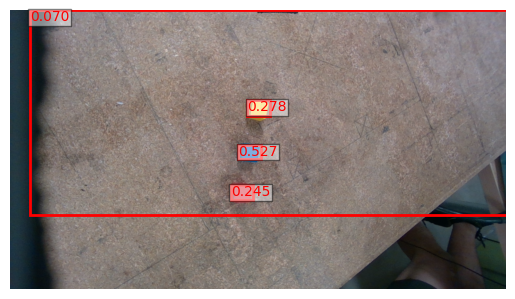

In [30]:
import matplotlib.patches as patches

img = image

# Plot the image
fig, ax = plt.subplots(1)
ax.imshow(img)
boxes = label_vit.sorted_boxes_coords
scores = label_vit.sorted_scores
# Add bounding boxes
for box, confidence in zip(boxes[:4], scores[:4]):
    x1, y1, x2, y2 = box
    width = 1.05*(x2 - x1)
    height = 1.3*(y2 - y1)
    print(box)
    rect = patches.Rectangle((x1, 1.8*y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, 1.8*y1, f'{confidence:.3f}', color='red', verticalalignment='top', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 1})

plt.axis('off')
plt.show()

In [6]:
label_vit.results[0]

tensor([260.4665,   5.4847, 268.5029,  23.9639], grad_fn=<SelectBackward0>)

In [7]:
label_vit.sorted_labeled_boxes_coords

[(array([598.03621054, 133.04095879, 665.15943766, 169.09430847]), 0),
 (array([714.5889926 , 167.06464604, 775.68063021, 198.67545292]), 0),
 (array([639.56506968, 209.76345286, 706.280725  , 244.3122603 ]), 0),
 (array([749.05323982,  84.55209285, 874.32017326, 152.23567933]), 0),
 (array([6.15347061e+02, 7.13869929e-02, 8.66977615e+02, 7.47033647e+01]), 0),
 (array([ 4.27083435e+02, -3.97675037e-01,  6.01778793e+02,  6.97742504e+01]),
  0),
 (array([ 4.57247872e+02, -3.37089300e-01,  5.44073234e+02,  3.32674062e+01]),
  0),
 (array([ 953.65805626,  340.47984838, 1175.12291908,  404.91934061]), 0),
 (array([1196.53684139,   92.01251507, 1278.17018986,  147.73954868]), 0),
 (array([749.53418255,  86.40344471, 852.75951862, 125.18072516]), 0),
 (array([597.32320309, 132.54213095, 666.41214848, 169.40849304]), 0),
 (array([ 990.29339671,  291.29765689, 1028.50360036,  316.08050644]), 0),
 (array([955.20243764, 169.27851051, 987.57878184, 189.13033873]), 0),
 (array([750.88162899,  75.06

In [69]:
index = 0
# this does the [x, y, z] --> [y, -x, z] grasp pose switch, and the -y inversio on the y-axis orientation
# rgbd_image, cpcd, tmat = pcd|.get_segment(label_vit.boxes, index, rgbd_image, rsc, type="box", display=False)
rgbd_image, cpcd, tmat, pca = pcd.get_segment(label_vit.sorted_labeled_boxes_coords, 
                                         index, 
                                         rgbd_image, 
                                         rsc, 
                                        #  type="box-dbscan", 
                                         type="box", 
                                        #  method="quat", 
                                         method="iterative", 
                                        #  display=False,
                                         display=True,
                                         viz_scale=1000)
tmat, tmat[:3, 3]

modified indices: [2 0 1]
z-axis dot product: [0.7069246]
[Open3D INFO] Window window_25 created.


WebVisualizer(window_uid='window_25')

(array([[ 4.04647815e-01,  8.32794272e-01, -3.77774862e-01,
         -1.88390845e-04],
        [-5.80105862e-01,  5.53112486e-01,  5.97949635e-01,
         -2.42551539e-02],
        [ 7.06921024e-01, -2.28096015e-02,  7.06924598e-01,
          3.87766416e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([-1.88390845e-04, -2.42551539e-02,  3.87766416e-01]))

[Open3D INFO] Sending init frames to window_25.


[6213:986][6958] (stun_port.cc:96): Binding request timed out from 192.168.0.x:58796 (enp3s0)
[6228:646][6958] (stun_port.cc:96): Binding request timed out from 192.168.0.x:43809 (enp3s0)
[6586:517][6958] (dtls_transport.cc:529): DtlsTransport[0|1|R_]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.
[6586:582][6958] (dtls_transport.cc:529): DtlsTransport[0|1|R_]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.
[6586:625][6958] (dtls_transport.cc:529): DtlsTransport[0|1|R_]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.
[6586:630][6958] (dtls_transport.cc:529): DtlsTransport[0|1|R_]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.
[6586:736][6958] (dtls_transport.cc:529): DtlsTransport[0|1|R_]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.
[6586:781][6958] (dtls_transport.cc:529): DtlsTransport[0|1|R_]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.
[6586:818][6958] (dtls_transport.cc:529): DtlsTransport[0|1|R_]: OnWritableState

In [25]:
mc = cpcd.compute_mean_and_covariance()
# rotate grasp pose -pi/2 about z-axis
grasp_pose = [mc[0][1], -mc[0][0], mc[0][2]]
grasp_pose

[-0.0011390042385238236, -0.0048835902492652275, 0.22529418163468426]

[834:161][6958] (stun_port.cc:96): Binding request timed out from 192.168.0.x:50492 (enp3s0)


In [11]:
tmat

array([[-5.17773847e-02, -2.90515451e-01, -9.55468406e-01,
        -1.54231234e-02],
       [ 6.57397265e-01, -7.30132070e-01,  1.86375954e-01,
        -4.15442091e-04],
       [-7.51763219e-01, -6.18472258e-01,  2.28788392e-01,
         2.96205793e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [12]:
index = 1
# this does the [x, y, z] --> [y, -x, z] grasp pose switch, and the -y inversio on the y-axis orientation
# rgbd_image, cpcd, tmat = pcd|.get_segment(label_vit.boxes, index, rgbd_image, rsc, type="box", display=False)
rgbd_image, cpcd1, tmat = pcd.get_segment(label_vit.boxes, 
                                         index, 
                                         rgbd_image, 
                                         rsc, 
                                         type="box-dbscan", 
                                        #  type="box", 
                                        #  method="quat", 
                                         method="iterative", 
                                         display=False,
                                        #  display=False,
                                         viz_scale=1000)


z-axis dot product: [0.9917355]


In [13]:
index = 2
# this does the [x, y, z] --> [y, -x, z] grasp pose switch, and the -y inversio on the y-axis orientation
# rgbd_image, cpcd, tmat = pcd|.get_segment(label_vit.boxes, index, rgbd_image, rsc, type="box", display=False)
rgbd_image, cpcd2, tmat = pcd.get_segment(label_vit.boxes, 
                                         index, 
                                         rgbd_image, 
                                         rsc, 
                                         type="box-dbscan", 
                                        #  type="box", 
                                        #  method="quat", 
                                         method="iterative", 
                                         display=False,
                                        #  display=False,
                                         viz_scale=1000)
tmat, tmat[:3, 3]

modified indices: [0 1 2]
z-axis dot product: [0.15255625]


(array([[ 0.98545648, -0.02937499,  0.16736974,  0.04476994],
        [ 0.16989091,  0.1497435 , -0.97401949,  0.04128194],
        [ 0.00354928,  0.98828842,  0.15255625,  0.32102329],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([0.04476994, 0.04128194, 0.32102329]))

In [99]:
tmat

array([[ 1.62301730e-01,  9.83383442e-01,  8.13336017e-02,
        -4.48233730e-02],
       [-9.79695008e-01,  1.50761551e-01,  1.32169003e-01,
        -9.76504066e-04],
       [ 1.17710829e-01, -1.01133381e-01,  9.87884710e-01,
         2.98713496e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [100]:
mobb = cpcd.get_minimal_oriented_bounding_box()
obb = cpcd.get_oriented_bounding_box()
mobb.extent, obb.extent
width = np.min([*mobb.extent[:3], *obb.extent[:3]])
width

0.0437999963760376

In [16]:
o3d.visualization.draw_geometries([cpcd, cpcd1, cpcd2])

In [15]:
# Segmentation Masks
mask_sam.set_image_and_labels(np.array(rgbd_image.color), np.array([np.array(i[0]) for i in label_vit.boxes]), label_vit.labels)

In [17]:
masks = mask_sam.get_masks(label_vit.labels)

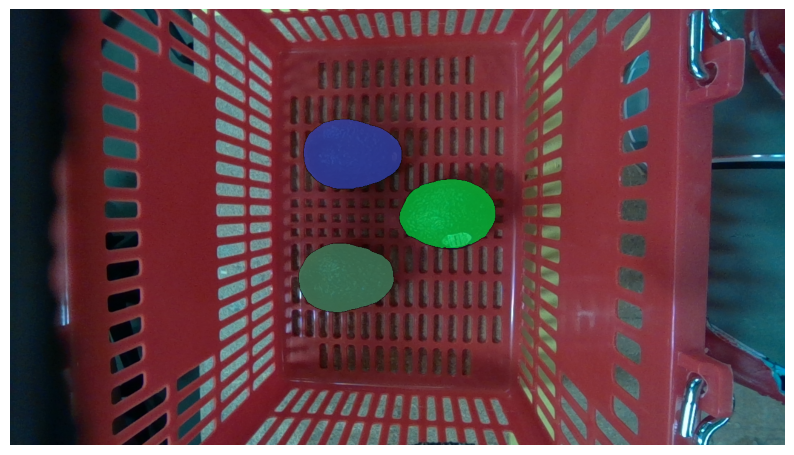

In [38]:
mask_sam.show_all_masks(np.array(rgbd_image.color))

In [43]:
# get first entry of tuple in boxes
b = [i[0] for i in label_vit.boxes]
l = label_vit.labels

(-0.5, 1279.5, 719.5, -0.5)

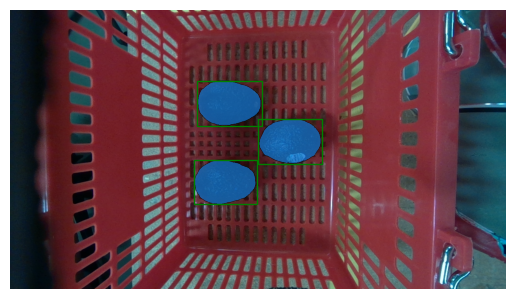

In [50]:
from PIL import Image, ImageDraw, ImageFont

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=1))  


plt.imshow(rgbd_image.color)
for mask in masks:
    show_mask(mask.cpu().numpy(), plt.gca(), random_color=False)
for box in b:
    show_box(np.array(box), plt.gca())
plt.axis('off')



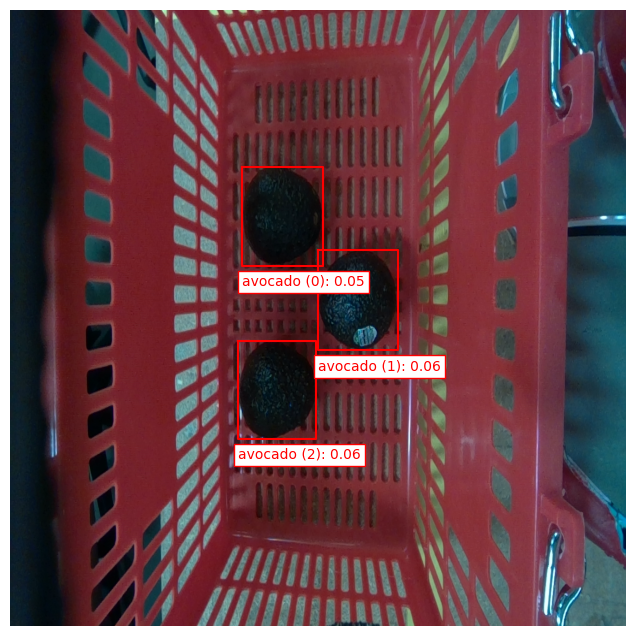

In [39]:
_, _ = label_vit.label(np.array(rgbd_image.color), queries, abbrevq, plot=True)

In [63]:
index = 0
rgbd_image, mcpcd, tmat, pca = pcd.get_segment(mask_sam.masks, 
                                          index, 
                                          rgbd_image, 
                                          rsc, 
                                          type="mask", 
                                          viz_scale=2500.0, 
                                          display=False,
                                          method="iterative")

z-axis dot product: [0.98546151]


In [64]:
tmat

array([[ 0.98697494, -0.16045605, -0.01159015, -0.05734346],
       [-0.16008375, -0.97244122, -0.16950301,  0.03629804],
       [-0.01592704, -0.16915062,  0.98546151,  0.31724131],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [65]:
index = 1
rgbd_image, mcpcd1, tmat, pca1 = pcd.get_segment(mask_sam.masks, 
                                          index, 
                                          rgbd_image, 
                                          rsc, 
                                          type="mask", 
                                          viz_scale=2500.0, 
                                          display=False,
                                          method="iterative")

z-axis dot product: [0.99064697]


In [66]:
tmat

array([[ 0.97236925,  0.23241679, -0.02191985, -0.00644827],
       [ 0.22748174, -0.96442416, -0.13467775, -0.04274227],
       [ 0.05244141, -0.12597013,  0.99064697,  0.30846284],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [67]:
index = 2
rgbd_image, mcpcd2, tmat, pca2 = pcd.get_segment(mask_sam.masks, 
                                          index, 
                                          rgbd_image, 
                                          rsc, 
                                          type="mask", 
                                          viz_scale=2500.0, 
                                          display=False,
                                          method="iterative")

z-axis dot product: [0.98567079]


In [68]:
tmat

array([[ 0.98665647, -0.16180182, -0.01814324,  0.04438557],
       [-0.1565328 , -0.97333117,  0.16770185,  0.04194964],
       [ 0.04479385,  0.1626241 ,  0.98567079,  0.32025074],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [35]:
tmat, tmat[:3, 3]

(array([[ 0.98665647, -0.16180182, -0.01814324,  0.04438557],
        [-0.1565328 , -0.97333117,  0.16770185,  0.04194964],
        [ 0.04479385,  0.1626241 ,  0.98567079,  0.32025074],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([0.04438557, 0.04194964, 0.32025074]))

In [37]:
worldFrame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.075, origin=[0, 0, 0])
o3d.visualization.draw_geometries([mcpcd, mcpcd1, mcpcd2, worldFrame, pca, pca1, pca2])